In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_points = 500
x1 = np.linspace(-2*np.pi, 2*np.pi, n_points)
x2 = np.linspace(0, 5, n_points)
y = np.cos(x1 + x2) * (x2**2)

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df.to_csv('generated_data.csv', index=False)

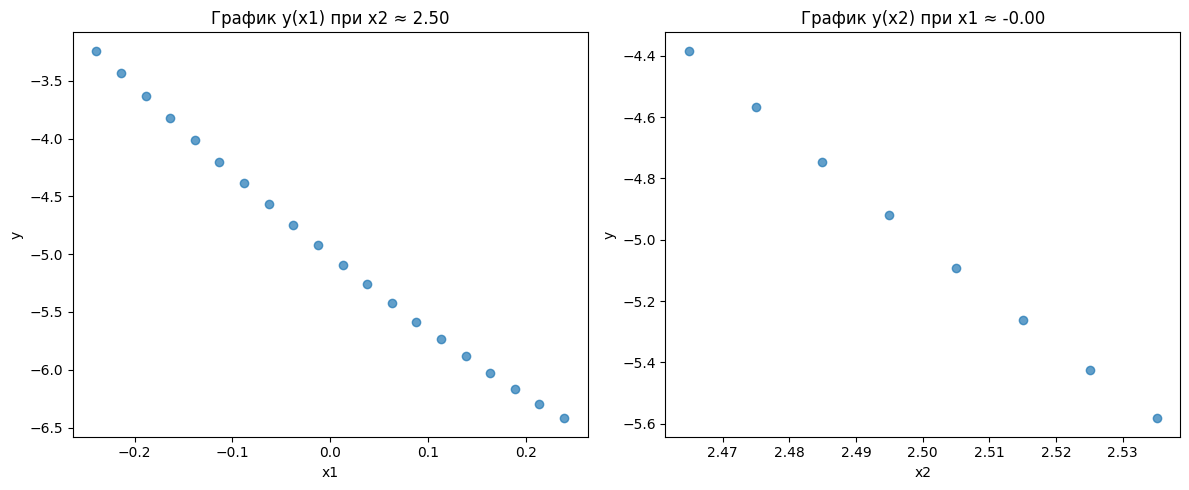

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

const_x2 = df['x2'].mean()
filtered_x2 = df[np.abs(df['x2'] - const_x2) < 0.1]
ax1.scatter(filtered_x2['x1'], filtered_x2['y'], alpha=0.7)
ax1.set_title(f'График y(x1) при x2 ≈ {const_x2:.2f}')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

const_x1 = df['x1'].mean()
filtered_x1 = df[np.abs(df['x1'] - const_x1) < 0.1]
ax2.scatter(filtered_x1['x2'], filtered_x1['y'], alpha=0.7)
ax2.set_title(f'График y(x2) при x1 ≈ {const_x1:.2f}')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

In [3]:
stats = df.agg(['mean', 'min', 'max'])
print("\nСтатистика по столбцам:")
print(stats)


Статистика по столбцам:
                x1   x2          y
mean -4.547474e-16  2.5  -1.300051
min  -6.283185e+00  0.0 -20.150465
max   6.283185e+00  5.0  12.952754


In [4]:
mean_x1 = df['x1'].mean()
mean_x2 = df['x2'].mean()
filtered_df = df[(df['x1'] < mean_x1) | (df['x2'] < mean_x2)]
filtered_df.to_csv('filtered_data.csv', index=False)
print(f"\nОтфильтровано строк: {len(filtered_df)}")


Отфильтровано строк: 250


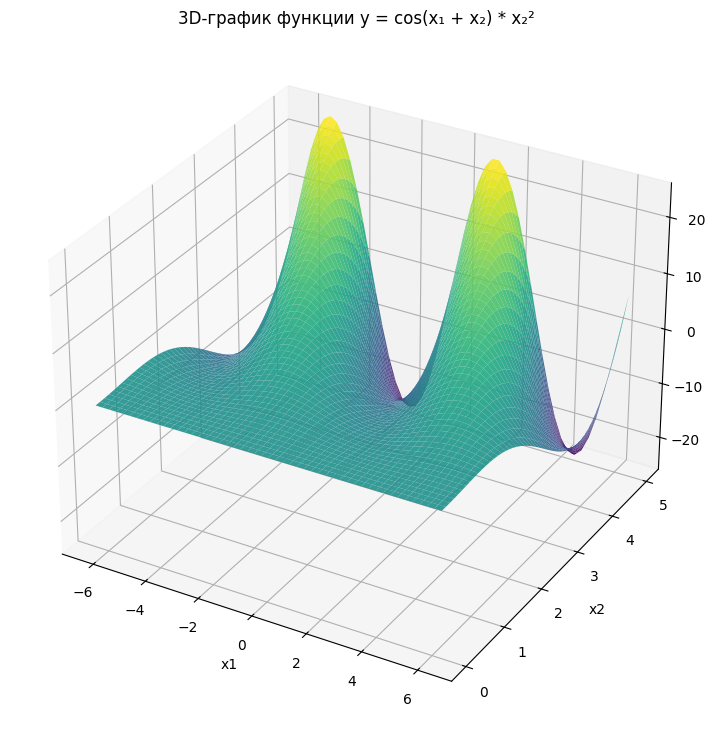

In [5]:
X1, X2 = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 50),
                     np.linspace(0, 5, 50))
Y = np.cos(X1 + X2) * (X2**2)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.9,
                       linewidth=0, antialiased=True)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D-график функции y = cos(x₁ + x₂) * x₂²')
plt.show()